In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import cv2
import os
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('./DATA'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) #path

./DATA/val/NORMAL/NORMAL2-IM-1431-0001.jpeg
./DATA/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
./DATA/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
./DATA/val/NORMAL/NORMAL2-IM-1436-0001.jpeg
./DATA/val/NORMAL/NORMAL2-IM-1440-0001.jpeg
./DATA/val/NORMAL/NORMAL2-IM-1442-0001.jpeg
./DATA/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
./DATA/val/NORMAL/NORMAL2-IM-1438-0001.jpeg
./DATA/val/ALVEOLI_INFECTION/person1951_bacteria_4882.jpeg
./DATA/val/ALVEOLI_INFECTION/person1946_bacteria_4874.jpeg
./DATA/val/ALVEOLI_INFECTION/person1950_bacteria_4881.jpeg
./DATA/val/ALVEOLI_INFECTION/person1949_bacteria_4880.jpeg
./DATA/val/ALVEOLI_INFECTION/person1946_bacteria_4875.jpeg
./DATA/val/ALVEOLI_INFECTION/person1954_bacteria_4886.jpeg
./DATA/val/ALVEOLI_INFECTION/person1947_bacteria_4876.jpeg
./DATA/val/ALVEOLI_INFECTION/person1952_bacteria_4883.jpeg
./DATA/__MACOSX/._chest_xray
./DATA/__MACOSX/chest_xray/._test
./DATA/__MACOSX/chest_xray/._.DS_Store
./DATA/__MACOSX/chest_xray/._train
./DATA/__MACOSX/chest_xray/val/._.DS_St

./DATA/test/NORMAL/IM-0003-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0340-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0251-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0096-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0279-0001.jpeg
./DATA/test/NORMAL/IM-0073-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0339-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0333-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0343-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0280-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0029-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0196-0001.jpeg
./DATA/test/NORMAL/IM-0006-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0317-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0252-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0378-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0322-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0081-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0362-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0366-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0370-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0051-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0135

./DATA/train/ALVEOLI_INFECTION/person1571_virus_2728.jpeg
./DATA/train/ALVEOLI_INFECTION/person255_bacteria_1160.jpeg
./DATA/train/ALVEOLI_INFECTION/person434_virus_883.jpeg
./DATA/train/ALVEOLI_INFECTION/person1192_bacteria_3141.jpeg
./DATA/train/ALVEOLI_INFECTION/person402_bacteria_1809.jpeg
./DATA/train/ALVEOLI_INFECTION/person639_virus_1220.jpeg
./DATA/train/ALVEOLI_INFECTION/person840_bacteria_2759.jpeg
./DATA/train/ALVEOLI_INFECTION/person1066_bacteria_3000.jpeg
./DATA/train/ALVEOLI_INFECTION/person23_bacteria_106.jpeg
./DATA/train/ALVEOLI_INFECTION/person583_bacteria_2409.jpeg
./DATA/train/ALVEOLI_INFECTION/person1446_bacteria_3739.jpeg
./DATA/train/ALVEOLI_INFECTION/person487_bacteria_2058.jpeg
./DATA/train/ALVEOLI_INFECTION/person51_bacteria_242.jpeg
./DATA/train/ALVEOLI_INFECTION/person300_virus_621.jpeg
./DATA/train/ALVEOLI_INFECTION/person1468_bacteria_3822.jpeg
./DATA/train/ALVEOLI_INFECTION/person1702_bacteria_4506.jpeg
./DATA/train/ALVEOLI_INFECTION/person1345_virus_2321

In [2]:
labels = ['ALVEOLI_INFECTION', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #single channel
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    return np.array(data)

In [3]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image

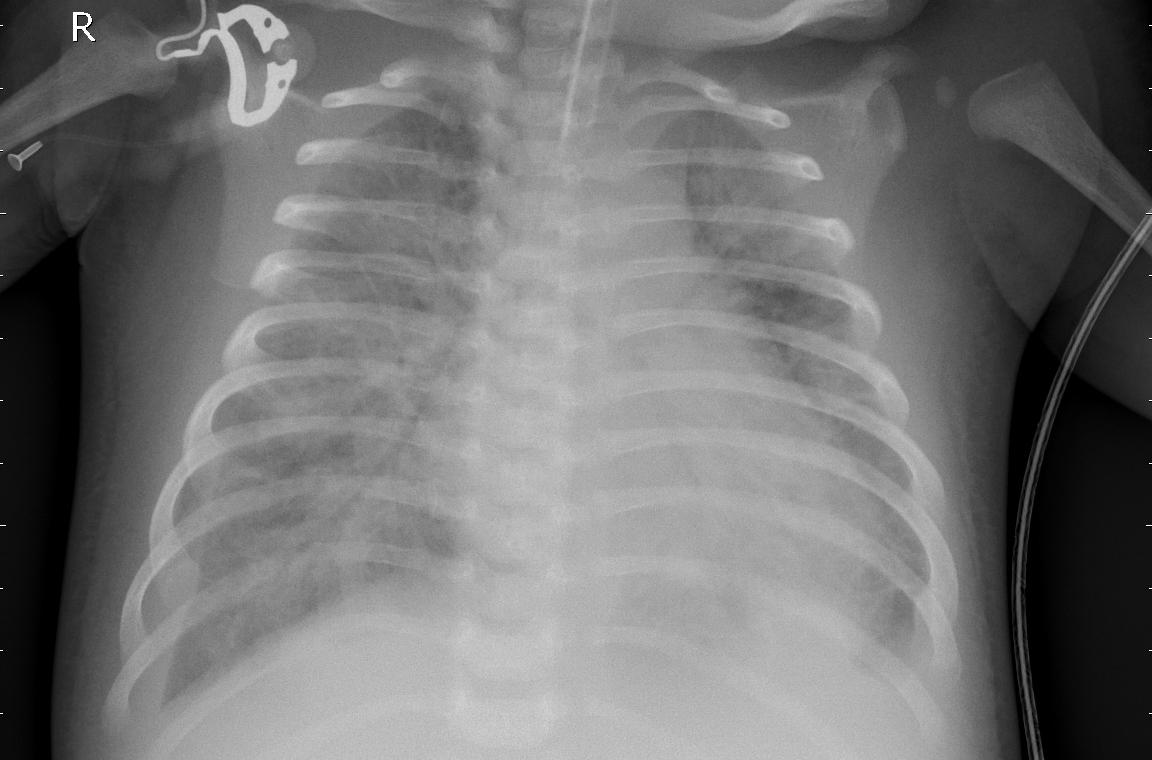

In [4]:
image="./DATA/chest_xray/train/ALVEOLI_INFECTION/person1000_bacteria_2931.jpeg"
PIL.Image.open(image)

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-03-06 21:41:20.089293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sanhita/jupyter/alveoli_cnn/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-06 21:41:20.089344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
training_dir="./DATA/chest_xray/train"
training_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
train_generator=training_generator.flow_from_directory(training_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [7]:
# 1.input 2.hidden 3.output

In [8]:
validation_dir="./DATA/chest_xray/val"
validation_generator=ImageDataGenerator(rescale=1/255)
val_generator=validation_generator.flow_from_directory(validation_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 16 images belonging to 2 classes.


In [9]:
test_dir="./DATA/chest_xray/test"
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(200,200),batch_size=16,class_mode='binary')

Found 624 images belonging to 2 classes.


In [10]:
train = get_training_data('./DATA/train')
test = get_training_data('./DATA/test')
val = get_training_data('./DATA/val')
print("Train",train.shape)
print("Test",test)
print("val",val)

Train (5216, 2)
Test [[array([[  0,   0,   0, ..., 193, 112,  11],
         [  0,   0,   0, ..., 210,  21,  11],
         [  0,   0,   0, ...,  18,  19,  10],
         ...,
         [  1,   2,   3, ...,   0,   0,  12],
         [  0,   0,   1, ...,   0,   0,   6],
         [  6,   3,   9, ...,   0,   0,   0]], dtype=uint8) 0]
 [array([[ 71,  31,  37, ...,  19,  16,  18],
         [ 56,  33,  35, ...,  20,  17,  18],
         [169,  39,  32, ...,  17,  15,  17],
         ...,
         [ 23,  18,  20, ...,  30,  28,  25],
         [ 46,  13,  19, ...,  30,  28,  25],
         [ 51,  45,  18, ...,  30,  28,  24]], dtype=uint8) 0]
 [array([[  0,   0,   0, ..., 146, 181,   3],
         [  0,   0,   0, ..., 251,   3,   5],
         [  0,   0,   0, ...,   4,   2,   1],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  1,  65,   2, ...,   0,   0,   0],
         [  3,  14,   1, ...,   0,   0,   0]], dtype=uint8) 0]
 ...
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, 

Text(0.5, 1.0, 'NORMAL')

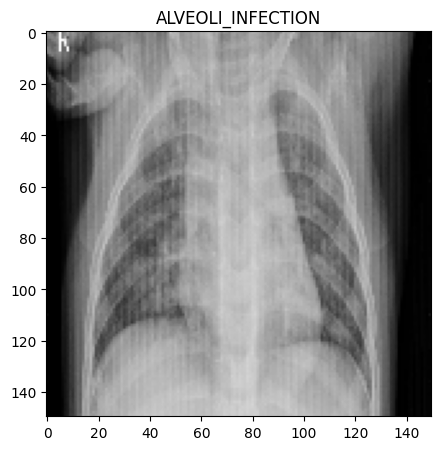

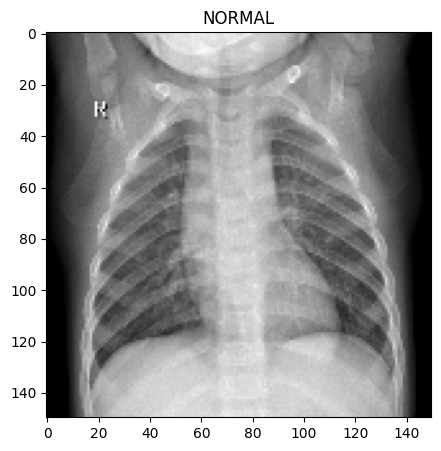

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [12]:
import tensorflow as tf
from tensorflow import keras # using keras with tensorflow backend
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input

In [13]:
model= Sequential()
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), #feature extraction
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'), #fully connected layer
    tf.keras.layers.Dense(1,activation='sigmoid') #output layer    
])

2023-03-06 21:44:05.997253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sanhita/jupyter/alveoli_cnn/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-06 21:44:06.013259: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-06 21:44:06.023387: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sanhita-Lenovo-IdeaPad-S145-15API): /proc/driver/nvidia/version does not exist
2023-03-06 21:44:06.067844: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compile

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [15]:
history = model.fit_generator(train_generator,validation_data = val_generator,epochs = 30,verbose = 1)
model.save('./models')

Epoch 1/30


2023-03-06 21:44:09.490824: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 26214400 exceeds 10% of free system memory.
2023-03-06 21:44:09.499793: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 26214400 exceeds 10% of free system memory.


1304/1304 [==============================] - 275s 208ms/step - loss: 0.5073 - acc: 0.7628 - val_loss: 0.5182 - val_acc: 0.7500
Epoch 2/30
1304/1304 [==============================] - 290s 222ms/step - loss: 0.4445 - acc: 0.7872 - val_loss: 0.5563 - val_acc: 0.8750
Epoch 3/30
1304/1304 [==============================] - 285s 218ms/step - loss: 0.3409 - acc: 0.8510 - val_loss: 0.3906 - val_acc: 0.8750
Epoch 4/30
1304/1304 [==============================] - 272s 208ms/step - loss: 0.2962 - acc: 0.8783 - val_loss: 0.7981 - val_acc: 0.7500
Epoch 5/30
1304/1304 [==============================] - 274s 210ms/step - loss: 0.2532 - acc: 0.8997 - val_loss: 0.7166 - val_acc: 0.7500
Epoch 6/30
1304/1304 [==============================] - 279s 214ms/step - loss: 0.2278 - acc: 0.9099 - val_loss: 0.4460 - val_acc: 0.8750
Epoch 7/30
1304/1304 [==============================] - 293s 225ms/step - loss: 0.2135 - acc: 0.9176 - val_loss: 0.8215 - val_acc: 0.8125
Epoch 8/30
1304/1304 [=======================

2023-03-07 00:01:39.127584: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./models/assets


In [16]:
pip install scipy



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install numpy scipy matplotlib ipython jupyter pandas sympy nose


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
keras --version

NameError: name 'version' is not defined

In [ ]:
keras --v


In [ ]:
pip install --upgrade pip